In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [263]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [264]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


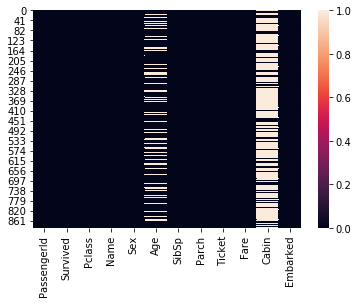

In [265]:
sns.heatmap(train.isnull())


In [266]:
train.drop('Cabin',axis=1,inplace=True)

In [267]:
test.drop('Cabin',axis=1,inplace=True)

In [268]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


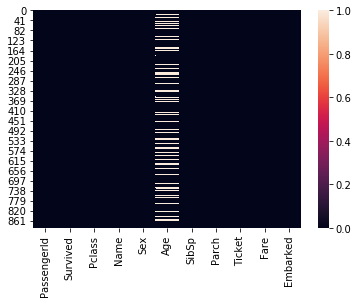

In [269]:
sns.heatmap(train.isnull())

In [270]:
combine = [train,test]

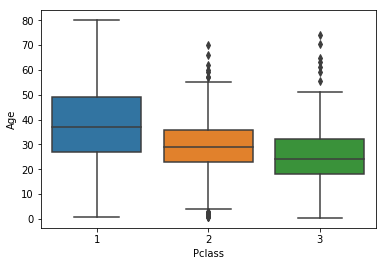

In [271]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [272]:
def fillNa_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 38
        if pclass == 2:
            return 30
        if pclass == 3:
            return 26
    else:
        return age

In [273]:
for dataset in combine:
    dataset['Age'] = dataset[['Age','Pclass']].apply(fillNa_age,axis=1)

In [274]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


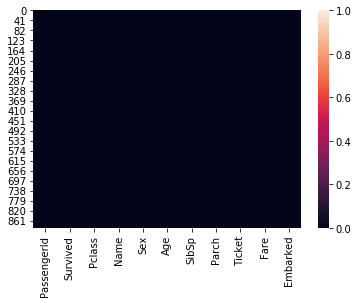

In [279]:
sns.heatmap(train.isnull())

In [280]:
sex_map = {'male' : 0 , 'female' : 1}

In [281]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_map)

In [282]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [283]:
embark_map = {'S' : 1 , 'C' : 2 , 'Q':3}

In [284]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embark_map)

In [285]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,NaN


In [286]:
train['Embarked'] = train['Embarked'].fillna(value = 3)


In [287]:
test['Embarked'] = test['Embarked'].fillna(value = 3)

In [288]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [289]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [290]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)

In [291]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,1


In [292]:
for dataset in combine:
    dataset.drop('Ticket',inplace = True, axis=1)

In [293]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,1


In [294]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [295]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,1,Mr


In [296]:
for dataset in combine:
    dataset.drop('Name',axis=1,inplace = True)

In [297]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7.2500,1,Mr
1,2,1,1,1,38,1,0,71.2833,2,Mrs
2,3,1,3,1,26,0,0,7.9250,1,Miss
3,4,1,1,1,35,1,0,53.1000,1,Mrs
4,5,0,3,0,35,0,0,8.0500,1,Mr


In [298]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [299]:
title_map = {'Mr' : 1,'Mrs' : 2,'Miss':3,'Master':4,'Rare':5}

In [300]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [301]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7.2500,1,Mr
1,2,1,1,1,38,1,0,71.2833,2,Mrs
2,3,1,3,1,26,0,0,7.9250,1,Miss
3,4,1,1,1,35,1,0,53.1000,1,Mrs
4,5,0,3,0,35,0,0,8.0500,1,Mr


In [302]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)

In [303]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22,1,0,7.2500,1,1
1,2,1,1,1,38,1,0,71.2833,2,2
2,3,1,3,1,26,0,0,7.9250,1,3
3,4,1,1,1,35,1,0,53.1000,1,2
4,5,0,3,0,35,0,0,8.0500,1,1


In [304]:
for dataset in combine:
    dataset['FareBand'] = pd.qcut(dataset['Fare'],4,labels=[1,2,3,4])

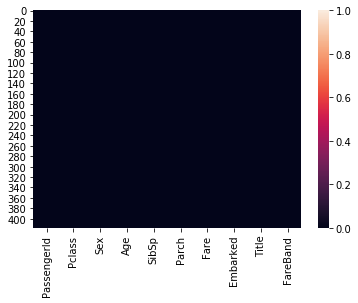

In [306]:
sns.heatmap(test.isna())

In [307]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,1,0,3,0,22,1,0,7.2500,1,1,1
1,2,1,1,1,38,1,0,71.2833,2,2,4
2,3,1,3,1,26,0,0,7.9250,1,3,2
3,4,1,1,1,35,1,0,53.1000,1,2,4
4,5,0,3,0,35,0,0,8.0500,1,1,2


In [308]:
train[['FareBand','Survived']].groupby(['FareBand']).mean()

,Survived
FareBand,
1,0.197309
2,0.303571
3,0.454955
4,0.581081


In [309]:
for dataset in combine:
    dataset['AgeBand'] = pd.qcut(dataset['Age'],5,labels=[1,2,3,4,5])

In [310]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand,AgeBand
0,1,0,3,0,22,1,0,7.2500,1,1,1,2
1,2,1,1,1,38,1,0,71.2833,2,2,4,4
2,3,1,3,1,26,0,0,7.9250,1,3,2,2
3,4,1,1,1,35,1,0,53.1000,1,2,4,4
4,5,0,3,0,35,0,0,8.0500,1,1,2,4


In [311]:
train[['AgeBand','Survived']].groupby(['AgeBand']).mean()

,Survived
AgeBand,
1,0.455556
2,0.298182
3,0.388350
4,0.461538
5,0.372881


In [312]:
for dataset in combine:
    dataset.drop('Age',inplace=True,axis=1)

In [313]:
for dataset in combine:
    dataset.drop('Fare',inplace=True,axis=1)

In [314]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FareBand,AgeBand
0,1,0,3,0,1,0,1,1,1,2
1,2,1,1,1,1,0,2,2,4,4
2,3,1,3,1,0,0,1,3,2,2
3,4,1,1,1,1,0,1,2,4,4
4,5,0,3,0,0,0,1,1,2,4


In [315]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FareBand,AgeBand
0,1,0,3,0,1,0,1,1,1,2
1,2,1,1,1,1,0,2,2,4,4
2,3,1,3,1,0,0,1,3,2,2
3,4,1,1,1,1,0,1,2,4,4
4,5,0,3,0,0,0,1,1,2,4


In [316]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [317]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FareBand,AgeBand,FamilySize
0,1,0,3,0,1,0,1,1,1,2,2
1,2,1,1,1,1,0,2,2,4,4,2
2,3,1,3,1,0,0,1,3,2,2,1
3,4,1,1,1,1,0,1,2,4,4,2
4,5,0,3,0,0,0,1,1,2,4,1


In [318]:
train[['FamilySize','Survived']].groupby('FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [319]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1

In [320]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,FareBand,AgeBand,FamilySize,IsAlone
0,1,0,3,0,1,0,1,1,1,2,2,0
1,2,1,1,1,1,0,2,2,4,4,2,0
2,3,1,3,1,0,0,1,3,2,2,1,1
3,4,1,1,1,1,0,1,2,4,4,2,0
4,5,0,3,0,0,0,1,1,2,4,1,1


In [321]:
for dataset in combine:
    dataset.drop('FamilySize',axis=1,inplace=True)

In [326]:
for dataset in combine:
    dataset.drop('SibSp',axis=1,inplace=True)

In [327]:
for dataset in combine:
    dataset.drop('Parch',axis=1,inplace=True)

In [331]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,FareBand,AgeBand,IsAlone
0,1,0,3,0,1,1,1,2,0
1,2,1,1,1,2,2,4,4,0
2,3,1,3,1,1,3,2,2,1
3,4,1,1,1,1,2,4,4,0
4,5,0,3,0,1,1,2,4,1


In [332]:
X_train = train.drop('Survived',axis=1)

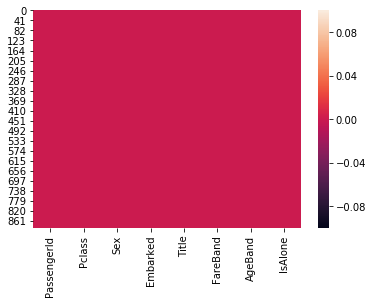

In [334]:
sns.heatmap(X_train.isna())

In [335]:
y_train = train['Survived']


In [336]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [337]:
X_test = test.drop('PassengerId',axis=1)

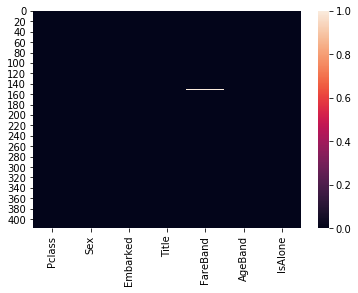

In [339]:
sns.heatmap(X_test.isna())

In [342]:
X_test['FareBand'] = X_test['FareBand'].fillna(value=3)

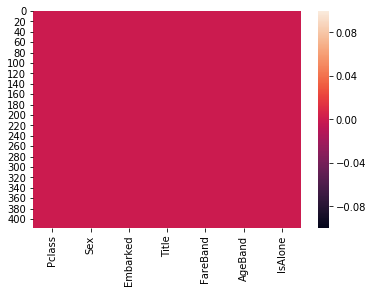

In [343]:
sns.heatmap(X_test.isna())

In [351]:
X_train = X_train.drop('PassengerId',axis=1)

In [352]:
X_train.head()

,Pclass,Sex,Embarked,Title,FareBand,AgeBand,IsAlone
0,3,0,1,1,1,2,0
1,1,1,2,2,4,4,0
2,3,1,1,3,2,2,1
3,1,1,1,2,4,4,0
4,3,0,1,1,2,4,1


In [349]:
X_test.head()

,Pclass,Sex,Embarked,Title,FareBand,AgeBand,IsAlone
0,3,0,3,1,1,4,1
1,3,1,1,2,1,5,0
2,2,0,3,1,2,5,1
3,3,0,1,1,2,3,1
4,3,1,1,2,2,2,0


In [353]:
from sklearn.linear_model import LogisticRegression

In [354]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [355]:
log_predict = logmodel.predict(X_test)

In [356]:
log_score = round(logmodel.score(X_train, y_train) * 100, 2)

In [357]:
log_score

79.69

In [358]:
from sklearn.svm import SVC
svmmodel = SVC()

In [359]:
svmmodel.fit(X_train,y_train)

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [360]:
svm_predict = svmmodel.predict(X_test)

In [361]:
svm_score = round(svmmodel.score(X_train, y_train) * 100, 2)

In [362]:
svm_score

83.73

In [365]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)

In [366]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [367]:
knn_predict = knnmodel.predict(X_test)

In [368]:
knn_score = round(knnmodel.score(X_train, y_train) * 100, 2)

In [369]:
knn_score

85.07

In [370]:
from sklearn.tree import DecisionTreeClassifier
dctmodel = DecisionTreeClassifier()

In [371]:
dctmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [372]:
dct_predict = dctmodel.predict(X_test)

In [373]:
dct_score = round(dctmodel.score(X_train, y_train) * 100, 2)

In [374]:
dct_score

88.55

In [375]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()

In [376]:
rfmodel.fit(X_train,y_train)

C:\Users\saurabhsonawane\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [377]:
rf_predict = rfmodel.predict(X_test)

In [378]:
rf_score = round(rfmodel.score(X_train, y_train) * 100, 2)

In [379]:
rf_score

88.44

In [385]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [svm_score, knn_score, log_score, rf_score, dct_score]}, index=[1,2,3,4,5])

In [384]:
models.sort_values(by = 'Score', ascending=False)

,Model,Score
5,Decision Tree,88.55
4,Random Forest,88.44
2,KNN,85.07
1,Support Vector Machines,83.73
3,Logistic Regression,79.69
